<a href="https://colab.research.google.com/github/DanielaOrtGon/AI_AugDec2024_1999960/blob/main/FFNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Activity 6: Artificial Neural Network: feedforward**

* Student's name: Daniela Ortega González
* ID: 1999960
* Group: 002
* Class: Thursday, N4-N6

**Load libraries**

In [70]:
# Libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.datasets import mnist

**Load data**

In [71]:
# Load Dataset (MNIST)
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

**Data preprocessing**

In [72]:
# Normalize the data (values between 0 and 1)
train_data = train_data / 255.0
test_data = test_data / 255.0

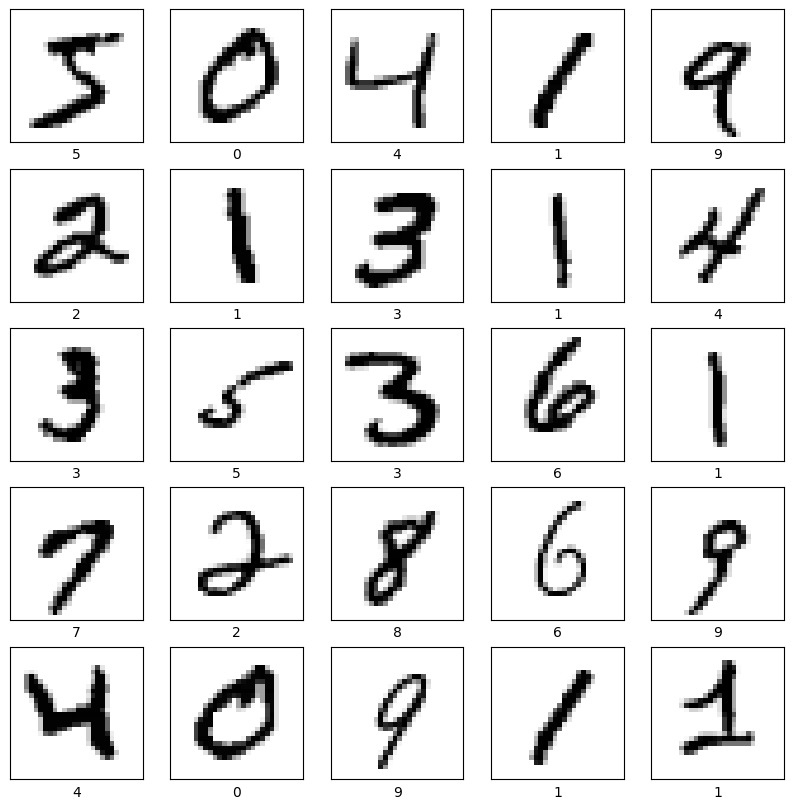

In [73]:
# Verify the Dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

**Model selection and training**


In [74]:
# Structure of the feedforward neural network
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    Dropout(0.5),                   # Dropout layer with 50% rate, to avoid overfitting
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax') # Output layer with 10 neurons (for digits 0-9), using softmax activation
])

In [75]:
# Compile the model with chosen loss function, optimizer, and evaluation metric
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [76]:
# Train the model
model.fit(train_data, train_labels, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7026 - loss: 0.9028
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9057 - loss: 0.3372
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9243 - loss: 0.2693
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9321 - loss: 0.2422
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9383 - loss: 0.2201
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9426 - loss: 0.2029
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9418 - loss: 0.1993
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9468 - loss: 0.1903
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9482 - loss: 0.1825
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9488 - loss: 0.1766


**Model testing**

In [77]:
# Evaluate the model's performance on the test data
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print('Test accuracy:', test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9688 - loss: 0.1116
Test accuracy: 0.972000002861023


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


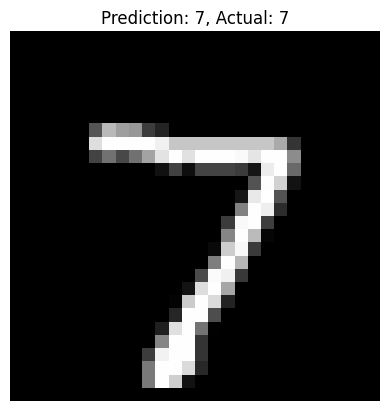

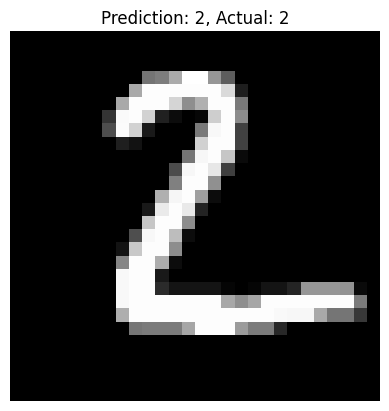

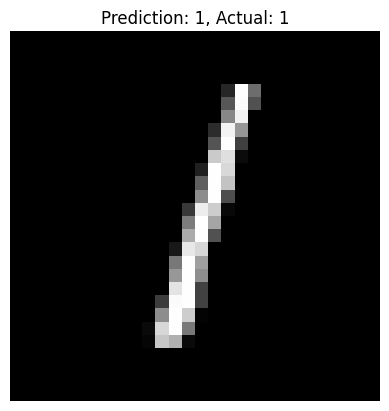

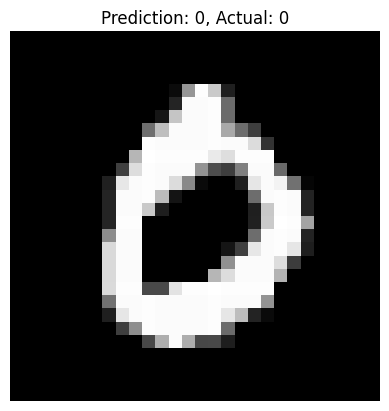

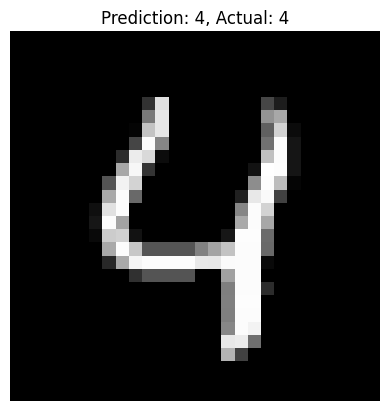

In [80]:
# Perform 5 predictions with the test dataset
predictions = model.predict(test_data[:5])
for i in range(5):
    predicted_label = np.argmax(predictions[i])
    actual_label = test_labels[i]

    # Display the image
    plt.imshow(test_data[i].reshape(28, 28), cmap='gray')
    plt.title(f"Prediction: {predicted_label}, Actual: {actual_label}")
    plt.axis('off')
    plt.show()